In [12]:
import numpy as np
from numba import jit


@jit(nopython = True)
def simulate_IFFL2(num, mean_N, D, gg,  gr, k, l, mu, fixed_N = False):
    dist = np.zeros((num,4))
    for i in range(dist.shape[0]):
        active=0 
        g = 0  
        r = 0
        t = 0
        if fixed_N:
            num_genomes = mean_N
        else:
            num_genomes = np.random.poisson(mean_N)
            
        if num_genomes == 0:
            dist[i,0] = 0
            dist[i,1] = 0
            dist[i,2] = 0
            dist[i,3] = 0
            continue
    
        while t < 200:
            choice = np.random.rand()
            nu = D*gg*mu/l
            denom = (l*(num_genomes-active) + (mu+nu)*active + g*gg + gr*r + k*r*g)
            t += np.random.exponential(1/denom)
            if choice < l*(num_genomes-active)/denom:
                ## turn on
                active = active + 1 
            elif choice < (l*(num_genomes-active)+ mu*active)/denom:
                ## turn off
                active = active - 1
            elif choice < (l*(num_genomes-active)+ (mu+nu)*active)/denom:
                # produce mRNA and miRNa
                r = r+1 # mRNA
                g = g+1 # miRNA
            elif choice < (l*(num_genomes-active)+ (mu+nu)*active + g*gg)/denom:
                # degrade mRNA
                g = g - 1
            elif choice < (l*(num_genomes-active)+ (mu+nu)*active + g*gg + gr*r)/denom:
                # degrade miRNA
                r = r - 1
            elif choice < (l*(num_genomes-active)+ (mu+nu)*active + g*gg + gr*r + k*r*g)/denom:
                # miRNA degrades mRNA
                g = g-1
            
        dist[i,0] = t
        dist[i,1] = g
        dist[i,2] = r
        dist[i,3] = num_genomes

    return dist


In [14]:
num_samples = 2000000
k = 0
dist_endogenous = simulate_IFFL2(
    num = num_samples,
    mean_N = 1,
    D = 10,
    gg = 1.0/8, 
    gr = 1/24.0,
    l= 2.5/8, 
    mu = 20, 
    k =k, 
    fixed_N = True
)

dist_lowtransduction = simulate_IFFL2(
    num = num_samples,
    mean_N = 1,
    D = 100,
    gg = 1.0/8,
    gr = 1.0/24,
    l = 8.0/8,
    mu = 1,
    k = k
)


dist_medtransduction = simulate_IFFL2(
    num = num_samples,
    mean_N = 3,
    D = 100,
    gg = 1.0/8,
    gr = 1.0/24,
    l = 8.0/8,
    mu = 1,
    k = k
)

dist_hightransduction = simulate_IFFL2(
    num = num_samples,
    mean_N = 9,
    D = 100,
    gg = 1.0/8,
    gr = 1.0/24,
    l = 8.0/8,
    mu = 1,
    k = k
)

k = 3.0/24/20
dist_lowtransduction_reg = simulate_IFFL2(
    num = num_samples,
    mean_N = 1,
    D = 100,
    gg = 1.0/8,
    gr = 1.0/24,
    l = 8.0/8,
    mu = 1,
    k = k
)


dist_medtransduction_reg = simulate_IFFL2(
    num = num_samples,
    mean_N = 3,
    D = 100,
    gg = 1.0/8,
    gr = 1.0/24,
    l = 8.0/8,
    mu = 1,
    k = k
)

dist_hightransduction_reg = simulate_IFFL2(
    num = num_samples,
    mean_N = 9,
    D = 100,
    gg = 1.0/8,
    gr = 1.0/24,
    l = 8.0/8,
    mu = 1,
    k = k
)


In [23]:
dist_hightransduction[:,3].mean()

8.9980265

In [24]:
import pandas as pd
import pickle

# saving files
simulation = {
    'dist_endogenous' : dist_endogenous,
    'dist_lowtransduction' : dist_lowtransduction,
    'dist_medtransduction' : dist_medtransduction,
    'dist_hightransduction' : dist_hightransduction,
    'dist_lowtransduction_reg' : dist_lowtransduction_reg,
    'dist_medtransduction_reg' : dist_medtransduction_reg,
    'dist_hightransduction_reg' : dist_hightransduction_reg,   
}

filename = "simulation_{0}.pkl".format(pd.Timestamp.now().strftime("%Y-%m-%d-%H-%M-%S"))

## uncomment to save simulation in pickle file
#print(filename)
#file = open(filename, 'wb')
#pickle.dump(simulation, file)
#file.close()

simulation_2023-11-16-05-23-13.pkl


In [30]:
with open('simulation_2023-11-16-05-23-13.pkl', 'rb') as f:
    sim = pickle.load(f)
    
dist_endogenous, dist_lowtransduction, dist_medtransduction, dist_hightransduction, \
dist_lowtransduction_reg, dist_medtransduction_reg, dist_hightransduction_reg = sim.values()
    
sim

{'dist_endogenous': array([[200.02144268,   4.        ,  19.        ,   1.        ],
        [200.11915631,   9.        ,  27.        ,   1.        ],
        [200.82660069,  10.        ,  30.        ,   1.        ],
        ...,
        [200.41007004,   9.        ,  24.        ,   1.        ],
        [200.42038245,   5.        ,  24.        ,   1.        ],
        [200.20453526,   6.        ,  19.        ,   1.        ]]),
 'dist_lowtransduction': array([[  0.        ,   0.        ,   0.        ,   0.        ],
        [200.00878159,  41.        , 128.        ,   1.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        ...,
        [200.00322015,  92.        , 274.        ,   2.        ],
        [200.01809125, 131.        , 344.        ,   2.        ],
        [200.00829175, 103.        , 311.        ,   2.        ]]),
 'dist_medtransduction': array([[200.06475456, 122.        , 345.        ,   2.        ],
        [200.05443491,  48.        , 141.    

In [28]:
dist_endogenous = dist_endogenous[:,1]
dist_lowtransduction = dist_lowtransduction[:,1]
dist_medtransduction = dist_medtransduction[:,1]
dist_hightransduction = dist_hightransduction[:,1]
dist_lowtransduction_reg = dist_lowtransduction_reg[:,1]
dist_medtransduction_reg = dist_medtransduction_reg[:,1]
dist_hightransduction_reg = dist_hightransduction_reg[:,1]

In [6]:
dist_hightransduction_reg.shape

(2000000,)

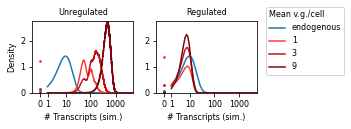

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm

cmap = matplotlib.cm.get_cmap('Reds')

fig, ax = plt.subplots(1,2, figsize = (360.0/72, 135.0/72))
plt.sca(ax[0])

plt.xscale("log")
#plt.yscale("log")


ns = np.arange(0, 100001)

endogenous_hist,_ = np.histogram(dist_endogenous, bins = ns - 0.5)
#plt.scatter(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "C0",  s= 0.3)
plt.plot(ns[2:],endogenous_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "endogenous", color = "C0")
plt.scatter(ns[1],endogenous_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = "C0", s = 3)


#plt.plot(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "grey")

low_hist,_ = np.histogram(dist_lowtransduction, bins = ns - 0.5)
#plt.scatter(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer", color = cmap(0.6), s = 0.3)
plt.plot(ns[2:],low_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "low titer", color = cmap(0.6))
plt.scatter(ns[1],low_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.6), s = 3)

#plt.plot(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer")


med_hist,_ = np.histogram(dist_medtransduction, bins = ns - 0.5)
#plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", color = cmap(0.8), s = 0.3)
plt.plot(ns[2:],med_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "medium titer", color = cmap(0.8))
plt.scatter(ns[1],med_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.8), s = 3)

#plt.plot(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer")


high_hist,_ = np.histogram(dist_hightransduction, bins = ns - 0.5)
#plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", color = cmap(0.95), s = 0.3)
plt.plot(ns[2:],high_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "high titer", color = cmap(0.95))

plt.scatter(ns[1],high_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.95), s = 3)

#plt.plot(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer")

#plt.scatter(ns,np.log10(1+dist_lowtransduction), label = "low titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")

#plt.scatter(ns,np.log10(1+dist_medtransduction), label = "medium titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")


#plt.scatter(ns,np.log10(1+dist_hightransduction), label = "high titer")
#plt.hist(np.log10(1+dist_hightransduction), bins = ns, label = "high titer", density = True, histtype = "step")


plt.xlim(.5, 5000)
plt.ylim(0, 2.75)

#plt.legend(fontsize = 10)
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel("# Transcripts (sim.)", fontsize = 8)
plt.ylabel("Density", fontsize = 8)
plt.title("Unregulated", fontsize = 8)


plt.sca(ax[1])

plt.xscale("log")
ns = np.arange(0, 100001)


endogenous_hist,_ = np.histogram(dist_endogenous, bins = ns - 0.5)
#plt.scatter(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "C0", s=0.3)
plt.plot(ns[2:],endogenous_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "endogenous", color = "C0")
plt.scatter(ns[1],endogenous_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = "C0", s = 3)


low_hist,_ = np.histogram(dist_lowtransduction_reg, bins = ns - 0.5)
#plt.scatter(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "<genomes> = 0.69", color = cmap(0.6), s = 0.3)
plt.plot(ns[2:],low_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "1", color = cmap(0.6))
plt.scatter(ns[1],low_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.6), s = 3)


med_hist,_ = np.histogram(dist_medtransduction_reg, bins = ns - 0.5)
#plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "<genomes> = 3.0", color = cmap(0.8), s = 0.3)
plt.plot(ns[2:],med_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "3", color = cmap(0.8))
plt.scatter(ns[1],med_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.8), s = 3)


high_hist,_ = np.histogram(dist_hightransduction_reg, bins = ns - 0.5)
#plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "<genomes> = 9.2", color = cmap(0.95), s = 0.3)
plt.plot(ns[2:],high_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "9", color = cmap(0.95))
plt.scatter(ns[1],high_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.95), s = 3)

#plt.xlim(0, 3)
plt.xlim(.5, 5000)
plt.ylim(0, 2.75)
leg = plt.legend(title = "Mean v.g./cell", fontsize = 8, bbox_to_anchor=(1.05, 0.2), title_fontsize = 8)
leg._legend_box.align = "left"
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel("# Transcripts (sim.)", fontsize = 8)
#plt.ylabel("Density", fontsize = 10)
plt.title("Regulated", fontsize = 8)


plt.tight_layout()
plt.savefig("UnregulatedVsRegulatedSim.pdf")
plt.show()

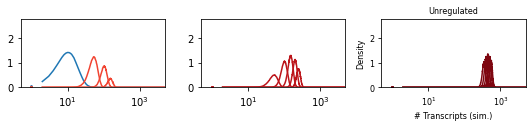

In [64]:
import matplotlib.pyplot as plt
import matplotlib.cm

cmap = matplotlib.cm.get_cmap('Reds')

fig, ax = plt.subplots(1,3, figsize = (540.0/72, 135.0/72))
plt.sca(ax[0])

plt.xscale("log")
#plt.yscale("log")


ns = np.arange(0, 100001)

endogenous_hist,_ = np.histogram(dist_endogenous[:,1], bins = ns - 0.5)
#plt.scatter(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "C0",  s= 0.3)
plt.plot(ns[2:],endogenous_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "endogenous", color = "C0")
plt.scatter(ns[1],endogenous_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = "C0", s = 3)


#plt.plot(ns[1:],endogenous_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "endogenous", color = "grey")

dist_lt =pd.DataFrame(dist_lowtransduction)
dist_lt = dist_lt.loc[dist_lt[3] ==1].copy()

low_hist,_ = np.histogram(dist_lt[1], bins = ns - 0.5)
#plt.scatter(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer", color = cmap(0.6), s = 0.3)
plt.plot(ns[2:],low_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "low titer, g = 1", color = cmap(0.6))
plt.scatter(ns[1],low_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.6), s = 3)

dist_lt =pd.DataFrame(dist_lowtransduction)
dist_lt = dist_lt.loc[dist_lt[3] ==2].copy()

low_hist,_ = np.histogram(dist_lt[1], bins = ns - 0.5)
#plt.scatter(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer", color = cmap(0.6), s = 0.3)
plt.plot(ns[2:],low_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "low titer, g = 2", color = cmap(0.6))
plt.scatter(ns[1],low_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.6), s = 3)


dist_lt =pd.DataFrame(dist_lowtransduction)
dist_lt = dist_lt.loc[dist_lt[3] ==3].copy()

low_hist,_ = np.histogram(dist_lt[1], bins = ns - 0.5)
#plt.scatter(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer", color = cmap(0.6), s = 0.3)
plt.plot(ns[2:],low_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "low titer, g = 3", color = cmap(0.6))
plt.scatter(ns[1],low_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.6), s = 3)

plt.xlim(.5, 5000)
plt.ylim(0, 2.75)

plt.sca(ax[1])
 
#plt.plot(ns[1:],low_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "low titer")

dist_mt =pd.DataFrame(dist_medtransduction)
dist_mt = dist_mt.loc[dist_mt[3] ==1].copy()

med_hist,_ = np.histogram(dist_mt[1], bins = ns - 0.5)
#plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", color = cmap(0.8), s = 0.3)
plt.plot(ns[2:],med_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "medium titer", color = cmap(0.8))
plt.scatter(ns[1],med_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.8), s = 3)

dist_mt =pd.DataFrame(dist_medtransduction)
dist_mt = dist_mt.loc[dist_mt[3] ==2].copy()

med_hist,_ = np.histogram(dist_mt[1], bins = ns - 0.5)
#plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", color = cmap(0.8), s = 0.3)
plt.plot(ns[2:],med_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "medium titer", color = cmap(0.8))
plt.scatter(ns[1],med_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.8), s = 3)


dist_mt =pd.DataFrame(dist_medtransduction)
dist_mt = dist_mt.loc[dist_mt[3] ==3].copy()

med_hist,_ = np.histogram(dist_mt[1], bins = ns - 0.5)
#plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", color = cmap(0.8), s = 0.3)
plt.plot(ns[2:],med_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "medium titer", color = cmap(0.8))
plt.scatter(ns[1],med_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.8), s = 3)

dist_mt =pd.DataFrame(dist_medtransduction)
dist_mt = dist_mt.loc[dist_mt[3] ==4].copy()

med_hist,_ = np.histogram(dist_mt[1], bins = ns - 0.5)
#plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", color = cmap(0.8), s = 0.3)
plt.plot(ns[2:],med_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "medium titer", color = cmap(0.8))
plt.scatter(ns[1],med_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.8), s = 3)

dist_mt =pd.DataFrame(dist_medtransduction)
dist_mt = dist_mt.loc[dist_mt[3] ==5].copy()

med_hist,_ = np.histogram(dist_mt[1], bins = ns - 0.5)
#plt.scatter(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer", color = cmap(0.8), s = 0.3)
plt.plot(ns[2:],med_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "medium titer", color = cmap(0.8))
plt.scatter(ns[1],med_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.8), s = 3)

#plt.plot(ns[1:],med_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "medium titer")

plt.xlim(.5, 5000)
plt.ylim(0, 2.75)
plt.xscale("log")
plt.sca(ax[2])


dist_ht =pd.DataFrame(dist_hightransduction)
dist_ht = dist_ht.loc[dist_ht[3] ==7].copy()

high_hist,_ = np.histogram(dist_ht[1], bins = ns - 0.5)
#plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", color = cmap(0.95), s = 0.3)
plt.plot(ns[2:],high_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "high titer", color = cmap(0.95))

plt.scatter(ns[1],high_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.95), s = 3)

dist_ht =pd.DataFrame(dist_hightransduction)
dist_ht = dist_ht.loc[dist_ht[3] ==8].copy()

high_hist,_ = np.histogram(dist_ht[1], bins = ns - 0.5)
#plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", color = cmap(0.95), s = 0.3)
plt.plot(ns[2:],high_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "high titer", color = cmap(0.95))

plt.scatter(ns[1],high_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.95), s = 3)


dist_ht =pd.DataFrame(dist_hightransduction)
dist_ht = dist_ht.loc[dist_ht[3] ==9].copy()

high_hist,_ = np.histogram(dist_ht[1], bins = ns - 0.5)
#plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", color = cmap(0.95), s = 0.3)
plt.plot(ns[2:],high_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "high titer", color = cmap(0.95))

plt.scatter(ns[1],high_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.95), s = 3)

dist_ht =pd.DataFrame(dist_hightransduction)
dist_ht = dist_ht.loc[dist_ht[3] ==10].copy()

high_hist,_ = np.histogram(dist_ht[1], bins = ns - 0.5)
#plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", color = cmap(0.95), s = 0.3)
plt.plot(ns[2:],high_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "high titer", color = cmap(0.95))

plt.scatter(ns[1],high_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.95), s = 3)

dist_ht =pd.DataFrame(dist_hightransduction)
dist_ht = dist_ht.loc[dist_ht[3] ==11].copy()

high_hist,_ = np.histogram(dist_ht[1], bins = ns - 0.5)
#plt.scatter(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer", color = cmap(0.95), s = 0.3)
plt.plot(ns[2:],high_hist[1:]/2e6/(np.log10(ns[2:] + 1) - np.log10(ns[2:])), label = "high titer", color = cmap(0.95))

plt.scatter(ns[1],high_hist[0]/2e6/(np.log10(ns[1] + 1) - np.log10(ns[1])), label = "", color = cmap(0.95), s = 3)


#plt.plot(ns[1:],high_hist/1e5/(np.log10(ns[1:] + 1) - np.log10(ns[1:])), label = "high titer")

#plt.scatter(ns,np.log10(1+dist_lowtransduction), label = "low titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")

#plt.scatter(ns,np.log10(1+dist_medtransduction), label = "medium titer")
#plt.hist(np.log10(1+dist_lowtransduction), bins = ns, label = "low titer", density = True, histtype = "step")


#plt.scatter(ns,np.log10(1+dist_hightransduction), label = "high titer")
#plt.hist(np.log10(1+dist_hightransduction), bins = ns, label = "high titer", density = True, histtype = "step")


plt.xlim(.5, 5000)
plt.ylim(0, 2.75)

#plt.legend(fontsize = 10)
plt.xticks(ticks = 1 + np.array([0,1,10,100,1000]), labels = ["0", "1","10","100","1000"], fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel("# Transcripts (sim.)", fontsize = 8)
plt.ylabel("Density", fontsize = 8)
plt.title("Unregulated", fontsize = 8)



plt.xscale("log")
ns = np.arange(0, 100001)




plt.tight_layout()
plt.show()

In [40]:
dist_lt

,0,1,2,3
0,200.053438,13.0,146.0,1.0
1,200.052088,8.0,150.0,1.0
4,200.012658,3.0,151.0,1.0
5,200.047090,4.0,151.0,1.0
6,200.131011,4.0,151.0,1.0
...,...,...,...,...
1999988,200.095889,7.0,158.0,1.0
1999990,200.041752,12.0,176.0,1.0
1999991,200.006406,6.0,144.0,1.0
1999993,200.053715,0.0,137.0,1.0
